# Import Libraries
Use escapechar to remove any line continuation
<br> Allow emojis in table

In [350]:
import emoji
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
df = pd.read_csv('./reddit_exercise_data.csv', sep=',', escapechar='\n')
pd.set_option('display.max_columns', df.shape[1])


In [319]:
#Check for data types and for null/na values
df.info(); df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
title           5000 non-null object
review          5000 non-null object
product_name    5000 non-null object
iso             5000 non-null object
score           5000 non-null int64
date            5000 non-null object
app_bought      5000 non-null int64
money_spent     5000 non-null int64
dtypes: int64(3), object(5)
memory usage: 312.6+ KB


title           0
review          0
product_name    0
iso             0
score           0
date            0
app_bought      0
money_spent     0
dtype: int64

In [320]:
df.head(10)

,title,review,product_name,iso,score,date,app_bought,money_spent
0,Love it!,I use this app to read r/nosleep stories befor...,Reddit Official App: Trending News and Hot Topics,US,5,17-7-10 0:0:0,47,140
1,•••,Dank memes,Reddit Official App: Trending News and Hot Topics,MY,5,17-7-10 0:0:0,3,10
2,Very good app,"Love the app, makes using Reddit very convenient",Reddit Official App: Trending News and Hot Topics,US,5,17-7-10 0:0:0,61,182
3,CNN here,As the CEO of CNN I find this app repulsive. A...,Reddit Official App: Trending News and Hot Topics,US,5,17-7-10 0:0:0,3,6
4,Easy peasy!,"I was infrequent in my visits, mainly mobile w...",Reddit Official App: Trending News and Hot Topics,US,5,17-7-10 0:0:0,59,178
5,Reddit!!!,Never knew it was something so useful,Reddit Official App: Trending News and Hot Topics,US,5,17-7-10 0:0:0,24,71
6,Good reading,It's good reading and I like the colours.,Reddit Official App: Trending News and Hot Topics,CA,5,17-7-10 0:0:0,28,112
7,Works great,"I've never been an active Reddit user, but the...",Reddit Official App: Trending News and Hot Topics,US,4,17-7-10 0:0:0,24,120
8,App is better than website,Please make your website equally easy to use. ...,Reddit Official App: Trending News and Hot Topics,US,5,17-7-10 0:0:0,35,140
9,Great Time Waster,The amount of time spent on this app is ridicu...,Reddit Official App: Trending News and Hot Topics,US,5,17-7-10 0:0:0,44,132


### Parsing various date formats
Judging by the legth size of the string

In [321]:
#there are 3 distinct date formats as per length of the string
#the last will need to be parsed separately since day is occuring first
#There must be more efficient way of doing it with pd.datetime.strptime() but this does it for now
df.date.str.len().value_counts()

19    2186
13    1717
12    1070
6       27
Name: date, dtype: int64

In [322]:
df.date[df.date.str.len()==6].value_counts()

6/9/17    27
Name: date, dtype: int64

In [323]:
idx_1 = df.date[df.date.str.len() < 11].index
idx_2 = df.date[df.date.str.len() > 11].index

In [324]:
for i in idx_1:
    df.loc[i, 'date'] = pd.to_datetime(df.date[i], dayfirst=True, infer_datetime_format=True)
for i in idx_2:
    df.loc[i, 'date'] = pd.to_datetime(df.date[i], yearfirst=True, infer_datetime_format=True)
df['date'] = pd.to_datetime(df.date)

In [325]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
title           5000 non-null object
review          5000 non-null object
product_name    5000 non-null object
iso             5000 non-null object
score           5000 non-null int64
date            5000 non-null datetime64[ns]
app_bought      5000 non-null int64
money_spent     5000 non-null int64
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 312.6+ KB


### Create Buckets
Equally spaced buckets 

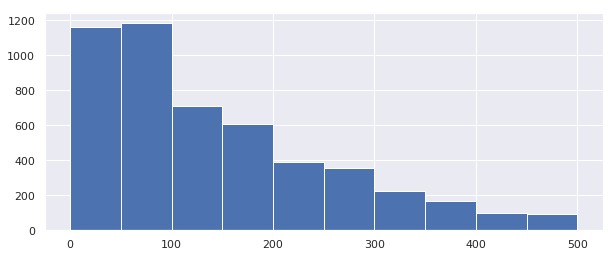

In [326]:
df.money_spent.hist(figsize=(10,4), bins=10,);

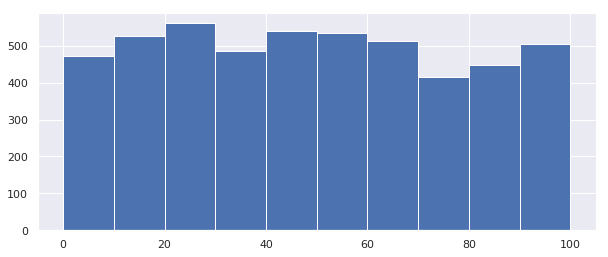

In [327]:
df.app_bought.hist(figsize=(10,4), bins=10);

In [328]:
# lbl_app = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']
# bin_app = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
# df['apps_bought_bucket'] = pd.cut(df.app_bought, bins = 10, labels=lbl_app)

In [329]:
lbl_app = ['0-20', '20-40', '40-60', '60-80', '80-100']
df['apps_bought_bucket'] = pd.cut(df.app_bought, bins = 5, labels=lbl_app)

In [330]:
lbl_mon = ['0-100', '100-200', '200-300', '300-400', '400-500']
# bin_mon = [0, 100, 200, 300, 400, 500]
df['money_spent_bucket'] = pd.cut(df.money_spent, bins = 5, labels=lbl_mon)

In [331]:
#Somewhat balanced buckets
df.apps_bought_bucket.value_counts()

40-60     1074
0-20      1058
20-40     1042
80-100     915
60-80      911
Name: apps_bought_bucket, dtype: int64

### Someone could select the buckets here according to Quantiles
```pd.qcut()```

In [332]:
pd.qcut(df.money_spent, [0, .25, .5, .75, 1.]).value_counts()

(108.0, 210.0]    1272
(-0.001, 53.0]    1255
(53.0, 108.0]     1251
(210.0, 500.0]    1222
Name: money_spent, dtype: int64

In [333]:
#Somewhat imbalanced buckets, this explains the right skewed distribution
df.money_spent_bucket.value_counts()

0-100      2399
100-200    1288
200-300     759
300-400     376
400-500     178
Name: money_spent_bucket, dtype: int64

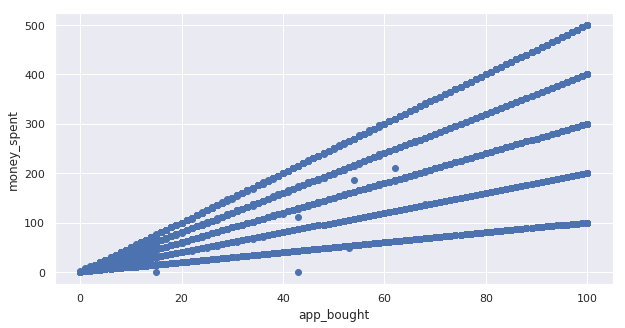

In [334]:
#Weird(maybe just artificial data?) 
plt.figure(figsize=(10,5))
plt.scatter(df.app_bought, df.money_spent);
plt.xlabel('app_bought');
plt.ylabel('money_spent');

In [335]:
df.date.max()

Timestamp('2017-09-06 00:00:00')

### Various Plots just to see some metrics

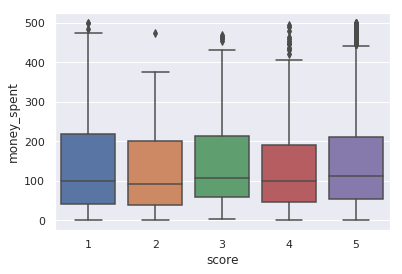

In [336]:
sns.boxplot(x='score', y='money_spent', data=df);

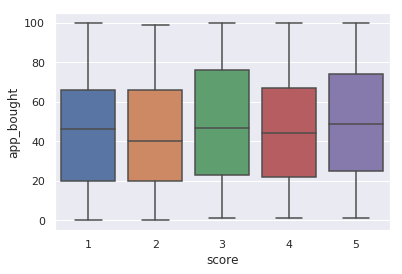

In [337]:
sns.boxplot(x='score', y='app_bought', data=df);

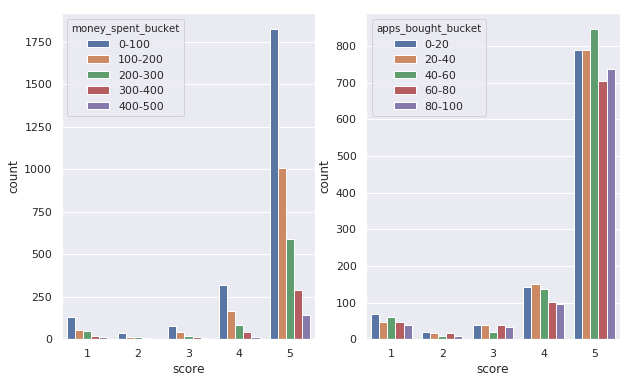

In [338]:
_, axes = plt.subplots(1, 2, figsize=(10, 6))
sns.countplot(x='score', hue='money_spent_bucket', data=df, ax=axes[0]);
sns.countplot(x='score', hue='apps_bought_bucket', data=df, ax=axes[1]);

### Create feature lists by type
Will become useful for some maniulation and indexing

In [351]:
num_feat = []
cat_feat = []
dt = []
for i in df:
    if df[i].dtype == np.int64 or df[i].dtype == np.float64:
        num_feat.append(i)
    elif df[i].dtype == 'datetime64[ns]':
        dt.append(i)
    else:
        cat_feat.append(i)

In [352]:
#Some Titles are exactly the same, this might be an issue for diferentiating reviews based on Title
#Reviews might also be numerical values to indicate a scale of satisfaction ex:1-10
df.title.nunique(), df.review.nunique()

(3044, 4405)

In [353]:
for i in cat_feat:
    print(i, df.duplicated(i).sum())

title 1956
review 595
product_name 4999
iso 4919
date 4947


In [354]:
df.money_spent_bucket.isnull().sum()

AttributeError: 'DataFrame' object has no attribute 'money_spent_bucket'

In [355]:
#At this point I relized that the duplicates previously just used very short expressions
#but they are not duplicate rows since the app bought and money spent are not same for the duplicated titles
df[df.duplicated()].sum()

title           0.0
review          0.0
product_name    0.0
iso             0.0
score           0.0
date            0.0
app_bought      0.0
money_spent     0.0
dtype: float64

In [356]:
df.review[198]

'Probably one of my favorite apps not only because of the content it provides, but the constant updates, and continuing support. One of the best apps in the ecosystem. \r\rDevelopers need to learn from this.'

In [357]:
cat_feat

['title', 'review', 'product_name', 'iso', 'date']

In [358]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
title           5000 non-null object
review          5000 non-null object
product_name    5000 non-null object
iso             5000 non-null object
score           5000 non-null int64
date            5000 non-null object
app_bought      5000 non-null int64
money_spent     5000 non-null int64
dtypes: int64(3), object(5)
memory usage: 312.6+ KB


In [365]:
for i in cat_feat[:2]:
    df[i] = df[i].str.replace(r'\r', '')
    df[i] = df[i].str.replace(r'r/', '')

In [366]:
df.review[198]

'Probably one of my favorite apps not only because of the content it provides, but the constant updates, and continuing support. One of the best apps in the ecosystem. Developers need to learn from this.'

In [364]:
df.review[:10]

0    I use this app to read nosleep stories before ...
1                                           Dank memes
2     Love the app, makes using Reddit very convenient
3    As the CEO of CNN I find this app repulsive. A...
4    I was infrequent in my visits, mainly mobile w...
5                Never knew it was something so useful
6            It's good reading and I like the colours.
7    I've never been an active Reddit user, but the...
8    Please make your website equally easy to use. ...
9    The amount of time spent on this app is ridicu...
Name: review, dtype: object

In [258]:
for i in cat_feat[:3]:
    df[i] = df[i].str.lower()
    #df[i] = df[i].str.replace('[^\w\s]', '')

In [279]:
df.review[0]

'i use this app to read nosleep stories before bed. i love it!'

In [278]:
df.review[198]

'probably one of my favorite apps not only because of the content it provides, but the constant updates, and continuing support. one of the best apps in the ecosystem. developers need to learn from this.'

In [261]:
x = pd.Series(' '.join(df.review).split()).value_counts()[:10]

In [262]:
x

the       2910
to        2257
i         2056
and       1768
app       1331
a         1325
it        1296
is        1096
of         897
reddit     885
dtype: int64

In [80]:
df.head(5)

,title,review,product_name,iso,...,app_bought,money_spent,apps_bought_bucket,money_spent_bucket
0,love it,i use this app to read nosleep stories before ...,reddit official app trending news and hot topics,US,...,47,140,40-60,100-200
1,,dank memes,reddit official app trending news and hot topics,MY,...,3,10,0-20,0-100
2,very good app,love the app makes using reddit very convenient,reddit official app trending news and hot topics,US,...,61,182,60-80,100-200
3,cnn here,as the ceo of cnn i find this app repulsive al...,reddit official app trending news and hot topics,US,...,3,6,0-20,0-100
4,easy peasy,i was infrequent in my visits mainly mobile we...,reddit official app trending news and hot topics,US,...,59,178,40-60,100-200


In [317]:
import re
pat = re.compile("[^\w\s]")
t = []
c = 0
for i in df.iloc[:, 1]:
    z = pat.findall(i)
    if len(z) > 1:
        t.append(z)
    elif len(z) == 1:
        t.append(z.pop())
df_pc = pd.DataFrame(t)
df_pc.shape

(3475, 174)

In [307]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
title                 5000 non-null object
review                5000 non-null object
product_name          5000 non-null object
iso                   5000 non-null object
score                 5000 non-null int64
date                  5000 non-null datetime64[ns]
app_bought            5000 non-null int64
money_spent           5000 non-null int64
apps_bought_bucket    5000 non-null category
money_spent_bucket    5000 non-null category
dtypes: category(2), datetime64[ns](1), int64(3), object(4)
memory usage: 322.7+ KB


In [308]:
df.review[4000:4980].str.find('^\w').value_counts()

-1    980
Name: review, dtype: int64

In [368]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
title           5000 non-null object
review          5000 non-null object
product_name    5000 non-null object
iso             5000 non-null object
score           5000 non-null int64
date            5000 non-null object
app_bought      5000 non-null int64
money_spent     5000 non-null int64
dtypes: int64(3), object(5)
memory usage: 312.6+ KB


In [ ]:
# print('\r',num_feat,'\n',cat_feat,'\n',dt)

In [ ]:
# d = pd.DataFrame(df.review.apply(pd.unique).astype(df.review.dtype))
# df_new = df[:]
# df_new[cat_feat[:-1]].astype(str, inplace=True);